<a href="https://colab.research.google.com/github/NakanoDataLab/data_analysis_100knocks/blob/main/Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第１章　**ウェブからの注文数を分析する１０本ノック**

In [1]:
# 作業ディレクトリの移動　#google colab

import os
import pandas as pd
from google.colab import drive

# Googleドライブをマウント
drive.mount('/content/drive')

# Googleドライブ内のデータフォルダを指定
DATA_ROOT_DIR = "/content/drive/My Drive/data_analysis_knock/"

# 作業ディレクトリを変更
os.chdir(DATA_ROOT_DIR)


Mounted at /content/drive


　　　　　　　　ノック01 データを読み込んでみよう！

In [2]:
# データを読み込む　#顧客情報リスト
import pandas as pd

customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,Cg######,森 裕樹,2024-11-16 00:56:31,yoichisato@yahoo.com,M,71,2005/09/01,山口県
1,HP######,高橋 知実,2024-08-24 15:35:06,hidekitakahashi@ogawa.net,F,34,1986/09/15,山口県
2,ZO######,伊藤 充,2023-09-25 17:43:36,nakajimayui@sato.jp,M,26,1975/09/26,鳥取県
3,Jy######,遠藤 健一,2024-07-21 14:58:34,momoko78@ito.jp,M,50,1966/07/17,岐阜県
4,dO######,中島 あすか,2023-06-12 13:40:24,asukasuzuki@sato.jp,M,70,1985/11/07,福井県


In [3]:
# データを読み込む　# 商品のリスト
item_master = pd.read_csv("item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
# データを読み込む　#取引データ-1
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000000,NaN,2024-08-02 06:41:56,BB######
1,T0000000001,340000.0,2024-04-27 05:11:03,Km######
2,T0000000002,50000.0,2025-02-22 17:42:24,hb######
3,T0000000003,NaN,2024-03-13 00:46:19,mS######
4,T0000000004,180000.0,2024-07-10 07:30:44,rH######


In [5]:
# データを読み込む　#取引データ-2
transaction_2 = pd.read_csv("transaction_2.csv")
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005000,1350000.0,2024-08-24 12:00:57,hb######
1,T0000005001,NaN,2024-10-19 10:36:15,KT######
2,T0000005002,840000.0,2024-05-28 15:22:36,dc######
3,T0000005003,50000.0,2024-07-21 09:49:14,Ej######
4,T0000005004,NaN,2024-07-02 04:36:00,tP######


In [6]:
# データを読み込む　# 取引詳細-1
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000002580,S004,1
1,1,T0000004391,S004,4
2,2,T0000002159,S002,2
3,3,T0000005708,S004,4
4,4,T0000003248,S002,3


In [7]:
# データを読み込む # 取引詳細-2
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000006343,S002,2
1,5001,T0000001811,S003,1
2,5002,T0000000527,S003,2
3,5003,T0000000916,S004,4
4,5004,T0000001708,S005,1


　　　　　　　　ノック02 「データを結合（ユニオン）してみよう」

In [9]:
# 結合前のデータ件数を確認
print('Transaction 1 件数:', len(transaction_1))
print('Transaction 2 件数:', len(transaction_2))

print('Transaction_detail_1 件数:', len(transaction_detail_1))
print('Transaction_detail_2 件数:', len(transaction_detail_2))

# データを結合（ユニオン）
unioned_transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)

# 詳細データも結合（ユニオン）
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)

# 結合後のデータ件数を確認
print('結合後の件数:', len(unioned_transaction))
print('結合後の件数:', len(transaction_detail))

# データの先頭の５行を確認
display(unioned_transaction.head())
display(transaction_detail.head())

Transaction 1 件数: 5000
Transaction 2 件数: 1786
Transaction_detail_1 件数: 5000
Transaction_detail_2 件数: 2144
結合後の件数: 6786
結合後の件数: 7144


,transaction_id,price,payment_date,customer_id
0,T0000000000,NaN,2024-08-02 06:41:56,BB######
1,T0000000001,340000.0,2024-04-27 05:11:03,Km######
2,T0000000002,50000.0,2025-02-22 17:42:24,hb######
3,T0000000003,NaN,2024-03-13 00:46:19,mS######
4,T0000000004,180000.0,2024-07-10 07:30:44,rH######


,detail_id,transaction_id,item_id,quantity
0,0,T0000002580,S004,1
1,1,T0000004391,S004,4
2,2,T0000002159,S002,2
3,3,T0000005708,S004,4
4,4,T0000003248,S002,3


　　　　　　　　ノック03 「売上データ同士を結合（マージ）してみよう！」

In [10]:
# "transaction_id" をキーにして結合
joined_transaction = pd.merge(
    unioned_transaction,  # 結合済みのトランザクションデータ
    transaction_detail,   # トランザクションの詳細データ
    on="transaction_id",  # 結合キー
    how="left"            # 左結合（取引データを基準に結合）
)

# 結合後のデータ件数を確認
print("結合後のデータ件数:", len(joined_transaction))

# 結合結果の確認（先頭5行）
display(joined_transaction.head())


結合後のデータ件数: 9514


,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000000,NaN,2024-08-02 06:41:56,BB######,NaN,NaN,NaN
1,T0000000001,340000.0,2024-04-27 05:11:03,Km######,542.0,S002,4.0
2,T0000000002,50000.0,2025-02-22 17:42:24,hb######,4001.0,S001,1.0
3,T0000000003,NaN,2024-03-13 00:46:19,mS######,NaN,NaN,NaN
4,T0000000004,180000.0,2024-07-10 07:30:44,rH######,1037.0,S004,1.0


            ノック０４ 「これまでのデータを結合する！

In [16]:
# "item_id" をキーにしてマージ（左結合）
joined_data = pd.merge(
    joined_transaction,  # 取引データ
    item_master,         # 商品データ
    on="item_id",        # キー
    how="left"           # 取引データを基準に結合
)
# "customer_id" をキーにしてマージ（左結合）
joined_data = pd.merge(
    joined_data,         # ここを `joined_data` にする
    customer_master,     # 顧客データ
    on="customer_id",    # キー
    how="left"           # 取引データを基準に結合
)

# 結合後のデータ件数を確認
print("結合後のデータ件数：", len(joined_data))

# 先頭5行を表示
display(joined_data.head())


結合後のデータ件数： 9514


,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000000,NaN,2024-08-02 06:41:56,BB######,NaN,NaN,NaN,NaN,NaN,藤田 京助,2023-10-30 14:09:02,hyamada@yahoo.com,F,37,1969/03/14,兵庫県
1,T0000000001,340000.0,2024-04-27 05:11:03,Km######,542.0,S002,4.0,PC-B,85000.0,藤井 里佳,2023-08-12 21:45:15,csuzuki@gmail.com,F,40,1970/08/26,佐賀県
2,T0000000002,50000.0,2025-02-22 17:42:24,hb######,4001.0,S001,1.0,PC-A,50000.0,鈴木 直子,2024-10-13 06:59:43,fsato@suzuki.com,F,71,1953/09/09,大分県
3,T0000000003,NaN,2024-03-13 00:46:19,mS######,NaN,NaN,NaN,NaN,NaN,中村 香織,2023-02-25 23:50:01,kenichi10@maeda.jp,M,51,2003/06/29,栃木県
4,T0000000004,180000.0,2024-07-10 07:30:44,rH######,1037.0,S004,1.0,PC-D,180000.0,渡辺 里佳,2024-12-15 17:56:59,gsuzuki@yahoo.com,M,73,1983/06/19,熊本県


公式のファイルとの誤差の調整

         ノック05 「必要なデータ列を作ろう！」

In [22]:
# 売上計算
joined_data["price"] = joined_data["quantity"] * joined_data["item_price"]

# 確認（先頭5行）
display(joined_data[["item_price", "quantity", "price"]].head())


,item_price,quantity,price
0,NaN,NaN,NaN
1,85000.0,4.0,340000.0
2,50000.0,1.0,50000.0
3,NaN,NaN,NaN
4,180000.0,1.0,180000.0


        ノック06 データ検算をしよう

In [ ]:
# データ加工前(unioned_transction)の"price"とデータ加工後(joined_data)の"price"を比較する

In [ ]:
print('加工後 :', joined_data['price'].sum())
print('加工前 :', unioned_transaction['price'].sum())

加工後 : 2314260000.0
加工前 : 2314260000.0


        ノック07 各種統計量を把握しよう

In [25]:
# 欠損値の確認
print(joined_data.isnull().sum())

transaction_id       0
price                0
payment_date         0
customer_id          0
detail_id            0
item_id              0
quantity             0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
dtype: int64


In [41]:
# 欠損地を0で埋める
joined_data = joined_data.fillna(0)

In [42]:
# 各種統計量の確認

print(joined_data.describe())

               price                   payment_date    detail_id     quantity  \
count    9514.000000                           9514  9514.000000  9514.000000   
mean   243247.845281  2024-09-06 14:04:32.882173696  2681.815850     1.883435   
min         0.000000            2024-03-06 23:41:37     0.000000     0.000000   
25%     50000.000000            2024-06-06 07:48:58     8.250000     1.000000   
50%    180000.000000            2024-09-06 06:14:01  2386.500000     2.000000   
75%    360000.000000     2024-12-06 16:58:18.500000  4764.750000     3.000000   
max    840000.000000            2025-03-07 04:34:23  7143.000000     4.000000   
std    235480.199093                            NaN  2362.234384     1.456028   

         item_price          age  
count    9514.00000  9514.000000  
mean    96756.35905    48.716418  
min         0.00000    18.000000  
25%     50000.00000    34.000000  
50%     85000.00000    49.000000  
75%    180000.00000    64.000000  
max    210000.00000    79

        ノック08 月別でデータを集計しよう

In [55]:
# payment_dateをdatetime型に変換
joined_data["payment_date"] = pd.to_datetime(joined_data["payment_date"])

# payment_monthを文字列からint型に変換
joined_data["payment_month"] = joined_data["payment_date"].dt.strftime("%Y%m").astype(int)

# 月別の集計
result = joined_data.groupby("payment_month")["price"].sum()

# 結果を表示
print(result)


payment_month
202403    145455000.0
202404    189915000.0
202405    221420000.0
202406    174925000.0
202407    207885000.0
202408    185120000.0
202409    200430000.0
202410    204535000.0
202411    180465000.0
202412    184195000.0
202501    182705000.0
202502    187665000.0
202503     49545000.0
Name: price, dtype: float64


        ノック09 集計コード

In [58]:
#月別、商品別にデータを集計
grouped_data =joined_data.groupby(['payment_month', 'item_name']).agg({
    'price': 'sum',
    'quantity': 'sum'
}).reset_index()
print(grouped_data)

    payment_month item_name       price  quantity
0          202403         0         0.0       0.0
1          202403      PC-A  10000000.0     200.0
2          202403      PC-B  16745000.0     197.0
3          202403      PC-C  23400000.0     195.0
4          202403      PC-D  39240000.0     218.0
..            ...       ...         ...       ...
73         202503      PC-A   4000000.0      80.0
74         202503      PC-B   6545000.0      77.0
75         202503      PC-C   7080000.0      59.0
76         202503      PC-D  13860000.0      77.0
77         202503      PC-E  18060000.0      86.0

[78 rows x 4 columns]


        ノック10 商品別の売り上げ推移を可視化するコードをまとめてみた！

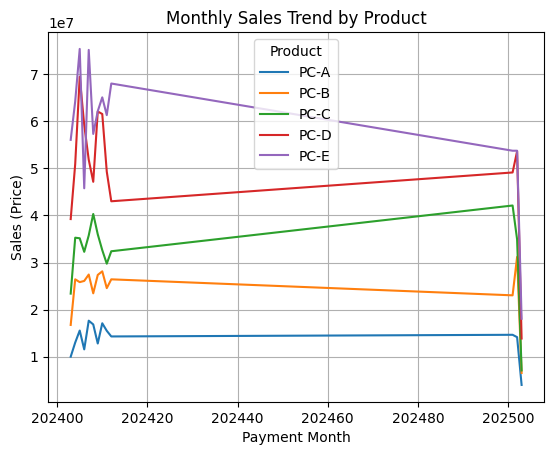

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

# グラフ用のデータを作成
graph_data = pd.pivot_table(
    joined_data,
    index="payment_month", #縦軸
    columns="item_name",   #横軸
    values="price",        #集計したい値
    aggfunc="sum"          #集計方法（今回は合計）
)
# グラフの描画
label_list = ["PC-{}".format(c) for c in "ABCDE"]
for label in label_list:
    plt.plot(list(graph_data.index), graph_data[label], label=label)

plt.title("Monthly Sales Trend by Product")
plt.xlabel("Payment Month")
plt.ylabel("Sales (Price)")
plt.legend(title="Product")
plt.grid(True)
plt.show()